In [1]:
import numpy as np
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# calibration
S = 80
beta = 0.96 ** (80/S)
delta = 1 - (1-0.05) ** (80/S)
sigma = 3
A = 1
alpha = 0.35
SS_tol = 10**(-6)

In [3]:
def get_r(K, params):
    '''
    firm FOC for capital
    '''
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    r = alpha*A*(sum(nvec)/K)**(1-alpha) - delta
    return r


def get_w(K, params):
    '''
    firm FOC for labor
    '''
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    w = (1-alpha)*A*(K/sum(nvec))**alpha 
    return w

In [4]:
def EulErr(bvec, params):
    '''
    Euler Errors given guess for bvec and parameters
    '''
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
   
    # wage and rental rate
    w = get_w(sum(bvec),params)
    r = get_r(sum(bvec),params)
    
    b = np.append(np.append(0,bvec),0)
    # consumption
    c = w * nvec + (1 + r) * b[:-1] - b[1:]
    
    # Euler errors
    EulErr = beta * (1 + r) * c[1:] ** (-sigma) - c[:-1] ** (-sigma) 
    
    return EulErr

In [5]:
def get_SS(params, bvec_guess, SS_graphs):
    '''
    compute the steady-state equilibrium 
    
    Inputs:
    params: a tuple of the parameters for the model params 
        = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
    bvec_guess: an initial guess of the steady-state savings
    SS_graphs: a Boolean that generates a figure of the steady-state distribution
    
    Outputs: 
    a Python dictionary with the steady-state solution values
    '''
    # unpack parameters
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    start_time = time.perf_counter() # Place at beginning of get_SS()
    
    # solve Euler equations
    ss = opt.root(EulErr, bvec_guess, tol = SS_tol, args = params) 
    b_ss = ss.x
    K_ss = sum(b_ss)
    w_ss = get_w(K_ss, params)
    r_ss = get_r(K_ss, params)
    b = np.append(np.append(0,b_ss),0)
    c_ss = w_ss * nvec + (1 + r_ss) * b[:-1] - b[1:]
    Y_ss = A * K_ss**alpha * L**(1-alpha)
    C_ss = sum(c_ss)
    
    ss_time = time.perf_counter() - start_time # Place at end of get_SS()
    
    EulErr_ss = EulErr(b_ss, params)
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    ss_output = { 
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
        'ss_time': ss_time}
    
    
    if SS_graphs == True:
        period = np.linspace(1,80,80)
        b = np.append(0,b_ss)
        fig = plt.figure(figsize = (6,6))
        plt.plot(period, c_ss, label=r'$\bar{c}_s$', marker='x') 
        plt.plot(period, b, label=r'$\bar{b}_s$', marker='o')
        plt.legend()
        plt.grid()
        plt.xlabel("Age Period")
        plt.show()
        
    return ss_output

In [6]:
# exogenous labor supply
nvec = np.zeros(S)
nvec[0:round(2*S/3)] = 1
nvec[round(2*S/3)+1:] = 0.2 
L = sum(nvec)

params = np.array([beta, sigma, nvec, L, A, alpha, delta, SS_tol])

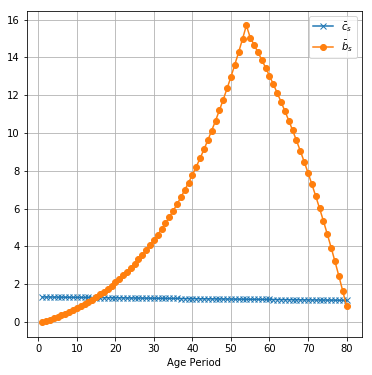

{'b_ss': array([ 0.05991559,  0.1243799 ,  0.19355274,  0.26759955,  0.34669144,
         0.43100595,  0.52072703,  0.61604524,  0.71715802,  0.8242699 ,
         0.93759282,  1.05734636,  1.183758  ,  1.31706344,  1.4575069 ,
         1.60534136,  1.76082897,  1.92424132,  2.09585977,  2.27597587,
         2.46489165,  2.66292005,  2.87038528,  3.08762325,  3.31498197,
         3.55282203,  3.80151698,  4.06145387,  4.33303368,  4.61667188,
         4.91279888,  5.22186064,  5.54431917,  5.88065316,  6.23135855,
         6.59694916,  6.97795732,  7.37493456,  7.7884523 ,  8.21910254,
         8.66749865,  9.13427606,  9.62009316, 10.12563203, 10.65159936,
        11.19872731, 11.76777443, 12.35952663, 12.97479815, 13.61443257,
        14.27930384, 14.97031696, 15.68841118, 15.05084266, 14.6692135 ,
        14.2759998 , 13.8707802 , 13.45311772, 13.02256053, 12.57864015,
        12.12087103, 11.64875019, 11.16175654, 10.65935029, 10.14097215,
         9.60604274,  9.05396178,  8.484107

In [7]:
get_SS(params, np.ones(S-1)*0.15, True)

In [8]:
# exogenous labor supply
nvec = np.zeros(S)
nvec[0:round(S/2)] = 1
nvec[round(S/2)+1:] = 0.2 
L = sum(nvec)

params = np.array([beta, sigma, nvec, L, A, alpha, delta, SS_tol])

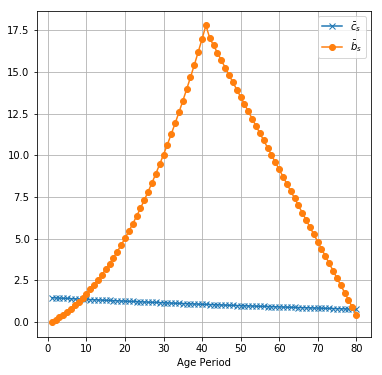

{'b_ss': array([ 0.13117612,  0.27628501,  0.43546406,  0.6088537 ,  0.7965975 ,
         0.99884212,  1.21573745,  1.4474366 ,  1.69409597,  1.9558753 ,
         2.23293768,  2.52544969,  2.83358134,  3.15750623,  3.4974015 ,
         3.85344798,  4.22583017,  4.61473634,  5.02035858,  5.44289284,
         5.88253899,  6.33950093,  6.81398656,  7.30620795,  7.81638131,
         8.3447271 ,  8.89147009,  9.45683943, 10.04106871, 10.64439601,
        11.26706404, 11.9093201 , 12.57141627, 13.25360941, 13.95616123,
        14.67933843, 15.42341272, 16.18866092, 16.97536502, 17.78381231,
        17.02681655, 16.58319987, 16.14061977, 15.69902514, 15.25836499,
        14.8185883 , 14.37964334, 13.94147807, 13.5040402 , 13.06727711,
        12.63113581, 12.19556294, 11.76050477, 11.3259072 , 10.8917157 ,
        10.45787536, 10.02433083,  9.59102634,  9.1579057 ,  8.72491224,
         8.29198885,  7.85907794,  7.42612141,  6.99306071,  6.55983673,
         6.12638989,  5.69266002,  5.258586

In [9]:
get_SS(params, np.ones(S-1)*0.15, True)